# <a name="0">Machine Learning Accelerator - Natural Language Processing - Lecture 2</a>

## GloVe Word Vectors
Word vectors refers to a family of related techniques, first gaining popularity via ```Word2Vec``` which associates an $n$-dimensional (normally $n$ is in the range of $50$ to $500$.  For us it will be $50$) vector to every word in the target language.

We will go over these:
1. <a href="#1">Load Glove Word Vectors</a>
2. <a href="#2">Visualization (PCA)</a>
3. <a href="#3">Cosine Similarity</a>

Let's first install the latest versions of the libraries.

In [1]:
# Upgrade dependencies
!pip install -q -r ../../requirements.txt

In [2]:
from torchtext.vocab import GloVe
GloVe.url['6B'] = 'https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip'
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
import matplotlib.pyplot as plt

## 1. <a name="1">Load Glove Word Vectors</a>
(<a href="#0">Go to top</a>)

We talked about __Word2Vec__ and __FastText__ as word embedding techniques. In this exercise we will use a set of pre-trained word embeddings. These are embeddings that someone else took the time and computational power to train. Another existing pre-trained word embeddings are the __GloVe__ embeddings. GloVe is a variation of a Word2Vec model. More information can be found here --> https://nlp.stanford.edu/projects/glove/

In this exercise, we will discover relationships between word vectors using the GloVe embeddings. 

We can easily import GloVe embeddings from the torchtext library. Here, we get vectors with $50$ dimensions. 

The `name` parameter refers to the particular pre-trained model that should be loaded: 

* Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 50d, 100d, 200d, & 300d vectors, 822 MB download): `"6B"`. This is the model that we will load here.
* Common Crawl (42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download): `"42B"`
* Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download): `"840B"`
* Etc (see documentation in Stanford link above)

In [3]:
# Load the model. You can change dim to 50, 100, 300
glove = GloVe(name="6B", dim=50)

.vector_cache/glove.6B.zip: 862MB [00:02, 331MB/s]                                
100%|█████████▉| 400000/400001 [00:10<00:00, 37049.96it/s]


Let's see some examples

In [4]:
print(f"cat -> {glove['cat']}\n")
print(f"computer -> {glove['computer']}\n")
print(f"human -> {glove['human']}")

cat -> tensor([ 0.4528, -0.5011, -0.5371, -0.0157,  0.2219,  0.5460, -0.6730, -0.6891,
         0.6349, -0.1973,  0.3368,  0.7735,  0.9009,  0.3849,  0.3837,  0.2657,
        -0.0806,  0.6109, -1.2894, -0.2231, -0.6158,  0.2170,  0.3561,  0.4450,
         0.6089, -1.1633, -1.1579,  0.3612,  0.1047, -0.7832,  1.4352,  0.1863,
        -0.2611,  0.8328, -0.2312,  0.3248,  0.1449, -0.4455,  0.3350, -0.9595,
        -0.0975,  0.4814, -0.4335,  0.6945,  0.9104, -0.2817,  0.4164, -1.2609,
         0.7128,  0.2378])

computer -> tensor([ 0.0791, -0.8150,  1.7901,  0.9165,  0.1080, -0.5563, -0.8443, -1.4951,
         0.1342,  0.6363,  0.3515,  0.2581, -0.5503,  0.5106,  0.3741,  0.1209,
        -1.6166,  0.8365,  0.1420, -0.5235,  0.7345,  0.1221, -0.4908,  0.3253,
         0.4531, -1.5850, -0.6385, -1.0053,  0.1045, -0.4298,  3.1810, -0.6219,
         0.1682, -1.0139,  0.0641,  0.5784, -0.4556,  0.7378,  0.3720, -0.5772,
         0.6644,  0.0551,  0.0379,  1.3275,  0.3099,  0.5070,  1.2357,  0

## 2. <a name="2">Visualization (PCA)</a>
(<a href="#0">Go to top</a>)

Let's visualize a collection of vectors by projecting it onto the best possible pair of directions.  We will use [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to do this. At the end, this will produce 2D vectors (instead of the original shape of 50D)

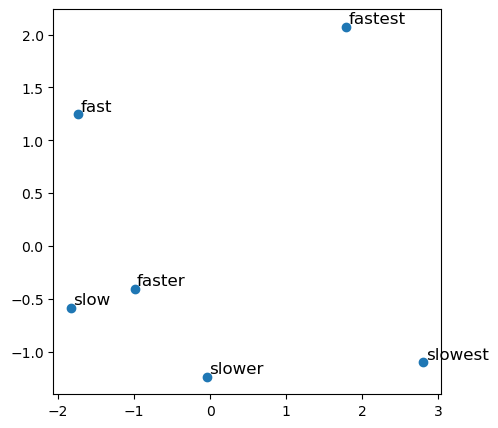

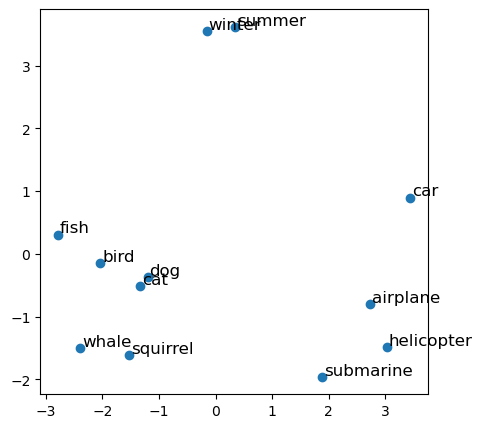

In [5]:
def pcaPlot(word_list):
    # fetch list of word vectors
    vecs = [glove[x].numpy() for x in word_list]

    # reduce dimensions
    model = PCA(n_components=2)
    reduced = model.fit_transform(vecs)
    xc = [v[0] for v in reduced]
    yc = [v[1] for v in reduced]

    # plot them
    plt.figure(figsize=(5, 5))
    plt.scatter(xc, yc)

    # label the plot
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(xc[i] + 0.03, yc[i] + 0.03), fontsize=12)
    plt.show()


pcaPlot(["fast", "faster", "fastest", "slow", "slower", "slowest"])
pcaPlot(
    [
        "bird",
        "cat",
        "squirrel",
        "dog",
        "fish",
        "helicopter",
        "airplane",
        "car",
        "submarine",
        "whale",
        "winter",
        "summer",
    ]
)

## 3. <a name="3">Cosine Similarity</a>
(<a href="#0">Go to top</a>)

We talked about cosine similarity in the class. Let's see an example here. We use the [cosine_similarity()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) function from sklearn to easily calculate cosine similarity between word vectors.

In [6]:
# define the similarity between two words
def similarity(w1, w2):
    return cosine_similarity([glove[w1].tolist()], [glove[w2].tolist()])


# Say if w1 is closer to w2 than w3
def simCompare(w1, w2, w3):
    s1 = similarity(w1, w2)
    s2 = similarity(w1, w3)
    if s1 > s2:
        print(f"'{w1}'\tis closer to\t'{w2}'\tthan\t'{w3}'\n")
    else:
        print(f"'{w1}'\tis closer to\t'{w3}'\tthan\t'{w2}'\n")

In [7]:
simCompare("actor", "pen", "film")
simCompare("car", "truck", "bike")
simCompare("cat", "dog", "sea")

'actor'	is closer to	'film'	than	'pen'

'car'	is closer to	'truck'	than	'bike'

'cat'	is closer to	'dog'	than	'sea'

